# Exercises: Working with Time Series Data

<hr style="border:2px solid gray">

<b>Exercises</b>
- Part I: ```sf_temps```
- Part II: ```seattle_weather```
- Part IIII: ```flights_20k```
<hr style="border:1px solid black">   

<b>Bonus Exercises</b>
- Bonus I: ```iowa_electricity```
- Bonus II: ```sf_temps```
- Bonus III: ```birdstrikes```

In [1]:
#standard ds imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#import data
from vega_datasets import data

#time series import
import datetime

<hr style="border:2px solid gray">

### Part I: ```sf_temps```

Use the ```sf_temps``` dataset for the following exercises:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. <b>Bonus</b>: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [2]:
#acquire the data from vega_datasets
sf_temps= data.sf_temps()

#let's look at the data
sf_temps.sample(3)

,temp,date
5400,57.8,2010-08-14 01:00:00
3166,54.0,2010-05-12 23:00:00
1842,54.1,2010-03-18 19:00:00


In [3]:
#check dtype. if date is not datetime, must convert
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


<div class="alert alert-block alert-success">
<b>Takeaways:</b>
<br>

- The dataframe only has two columns (date and temperature)
<br>

- We want to set the date to our index
<br>

- If date was not already a datetime64[ns], we would need to convert it to one 

</div>

In [4]:
#set date as index and sort
sf_temps = sf_temps.set_index('date').sort_index()

In [5]:
#confirm index is set to datetime
type(sf_temps.index)

pandas.core.indexes.datetimes.DatetimeIndex

<b> #1. Resample by the day and take the average temperature. Visualize the average temperature over time. </b>

<div class="alert alert-block alert-info">
<b>Note:</b> 

- This question is asking for average- so we know we'll be using mean
- We also know that we'll have to resample by day ('D')
</div>

In [6]:
#take a look at the new data
sf_temps.resample('D').mean().head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


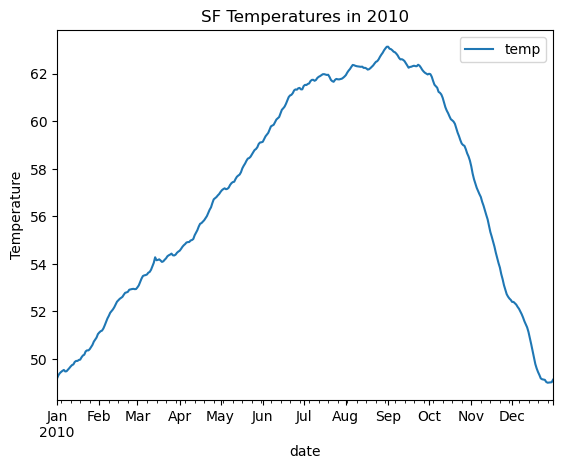

In [7]:
#we will plot our daily averages
sf_temps.resample('D').mean().plot()
plt.title('SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

<b> #2. Write the code necessary to visualize the minimum temperature over time. </b>

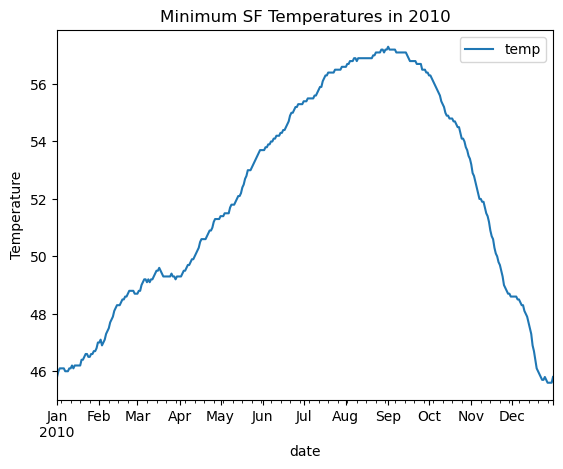

In [8]:
#We will now need to get the daily minimum
sf_temps.resample('D').min().plot()
plt.title('Minimum SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

<b> #3. Write the code necessary to visualize the maximum temperature over time. </b>

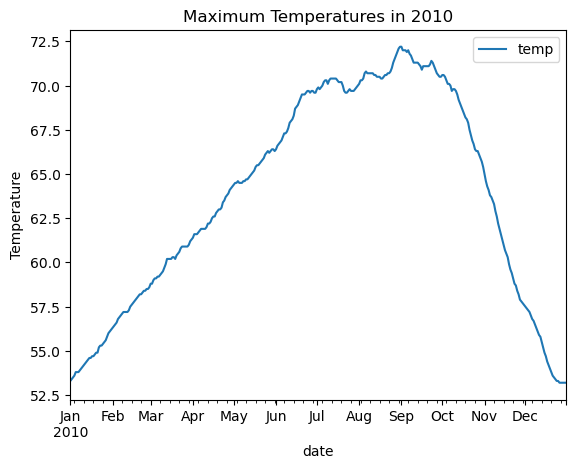

In [9]:
#and the daily max temp
sf_temps.resample('D').max().plot()
plt.title('Maximum Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

<b>#4. Which month is the coldest, on average?</b>
- <b>Answer</b>: January (2010-01-31)

<div class="alert alert-block alert-info">
<b>Note:</b> 

- This question is asking for average- so we know we'll be using mean
- We also know that we'll have to resample by month ('M')
</div>

In [10]:
#Get the monthly average temp
sf_temps.temp.resample('M').mean().sort_values().head(1)

date
2010-01-31    49.98414
Name: temp, dtype: float64

In [11]:
#assign average temps to a variable
average_temps = sf_temps.resample('M').mean()

In [12]:
#now let's call that variable and get the min
average_temps.min()

temp    49.98414
dtype: float64

In [13]:
#another way to do this might be to get the descriptive stats
#but this will only give us the temp, not the month
average_temps.describe()

,temp
count,12.000000
mean,56.902309
std,4.610790
min,49.984140
25%,53.528370
50%,56.802012
75%,60.774906
max,62.487083


<b> #5. Which month has the highest average temperature?</b>
- <b>Answer</b>: September (2010-09-30)

In [14]:
#get average temps by month
sf_temps.temp.resample('M').mean().sort_values(ascending=False)

date
2010-09-30    62.487083
2010-08-31    62.405376
2010-07-31    61.765457
2010-06-30    60.444722
2010-10-31    60.253091
2010-05-31    57.970968
2010-04-30    55.633056
2010-11-30    55.185139
2010-03-31    53.956528
2010-02-28    52.243899
2010-12-31    50.498253
2010-01-31    49.984140
Name: temp, dtype: float64

In [15]:
#Another way to accomplish this
sf_temps.temp.resample('M').mean().sort_values().tail(1)

date
2010-09-30    62.487083
Name: temp, dtype: float64

In [16]:
#descriptive stats
average_temps.describe()

,temp
count,12.000000
mean,56.902309
std,4.610790
min,49.984140
25%,53.528370
50%,56.802012
75%,60.774906
max,62.487083


<b> #6. Resample by the day and calculate the min and max temp for the day (Hint: ```.agg(['min', 'max'])```). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?</b>
- <b>Answer</b>: August (2010-08-31) with 15.00 degrees

In [17]:
#resample temps by day- add min max columns
daily_temps = sf_temps.temp.resample('D').agg(['min', 'max'])

In [18]:
#take a look
daily_temps

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [19]:
#create column that shows the temp difference between min and max
daily_temps['temp_diff'] = daily_temps['max'] - daily_temps['min']

In [20]:
#make sure new column was created
daily_temps

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [21]:
#sort the values to see temp difference to answer question
daily_temps.temp_diff.resample('M').max().sort_values(ascending=False)

date
2010-08-31    15.0
2010-09-30    14.9
2010-06-30    14.8
2010-07-31    14.8
2010-10-31    14.4
2010-05-31    13.1
2010-04-30    13.0
2010-03-31    12.0
2010-11-30    11.8
2010-02-28     9.9
2010-01-31     9.3
2010-12-31     8.9
Name: temp_diff, dtype: float64

<b> #7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.</b>

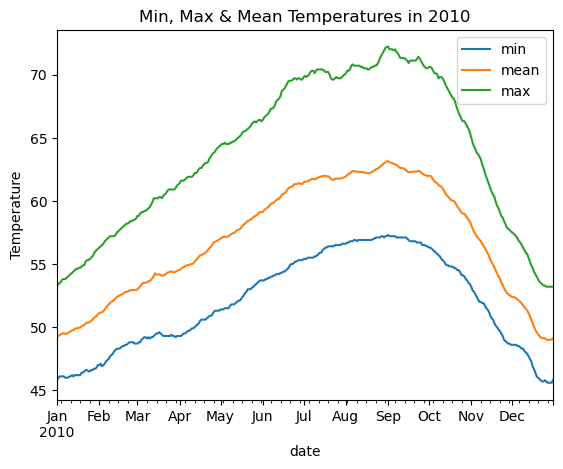

In [22]:
#resample temperatures by day- get min max and average
sf_temps.temp.resample('D').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Max & Mean Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

<hr style="border:2px solid gray">

### Part II: ```seattle_weather```

Use the ```seattle_weather``` dataset for the following exercises:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [23]:
from vega_datasets import data
seattle = data.seattle_weather()
seattle.sample(5)

,date,precipitation,temp_max,temp_min,wind,weather
53,2012-02-23,0.0,8.3,2.8,3.9,sun
13,2012-01-14,4.1,4.4,0.6,5.3,snow
43,2012-02-13,11.4,7.2,4.4,1.4,rain
709,2013-12-10,0.0,5.6,0.6,1.5,sun
1391,2015-10-23,0.0,12.8,7.2,2.6,fog


In [24]:
#make sure the dtype is correct
seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [25]:
#check the index- should be date
type(seattle.index)

#it is not, must change that

pandas.core.indexes.range.RangeIndex

In [26]:
#must complete step 2&3 (set date as index and sort)
seattle = seattle.set_index('date').sort_index()

In [27]:
#make sure index was reset
type(seattle.index)

pandas.core.indexes.datetimes.DatetimeIndex

<b>1. Which year and month combination has the highest amount of precipitation?</b>
- <b>Answer</b>: March 2015

In [28]:
seattle.precipitation.resample('M').mean().sort_values(ascending=False)

date
2015-12-31    9.177419
2014-03-31    7.741935
2015-11-30    7.086667
2012-11-30    7.016667
2012-03-31    5.903226
2012-12-31    5.612903
2012-01-31    5.590323
2014-02-28    5.542857
2014-10-31    5.532258
2012-10-31    5.493548
2013-09-30    5.226667
2013-04-30    4.986667
2015-02-28    4.792857
2014-11-30    4.103333
2015-10-31    3.948387
2014-12-31    3.929032
2015-03-31    3.661290
2014-04-30    3.536667
2013-01-31    3.409677
2013-11-30    3.210000
2012-02-29    3.182759
2014-01-31    3.032258
2015-01-31    3.000000
2015-08-31    2.687097
2014-05-31    2.580645
2012-06-30    2.503333
2012-04-30    2.270000
2013-03-31    2.248387
2013-05-31    1.951613
2014-09-30    1.890000
2015-04-30    1.720000
2012-05-31    1.683871
2014-08-31    1.483871
2013-02-28    1.439286
2013-12-31    1.367742
2013-10-31    1.264516
2013-08-31    1.109677
2013-06-30    1.103333
2012-07-31    0.848387
2015-09-30    0.703333
2014-07-31    0.632258
2014-06-30    0.626667
2015-05-31    0.477419
2015-0

In [29]:
seattle.precipitation.max()

55.9

In [30]:
seattle.precipitation.sort_values(ascending=False).head(1)

date
2015-03-15    55.9
Name: precipitation, dtype: float64

<b>2. Visualize the amount of monthly precipitation over time.

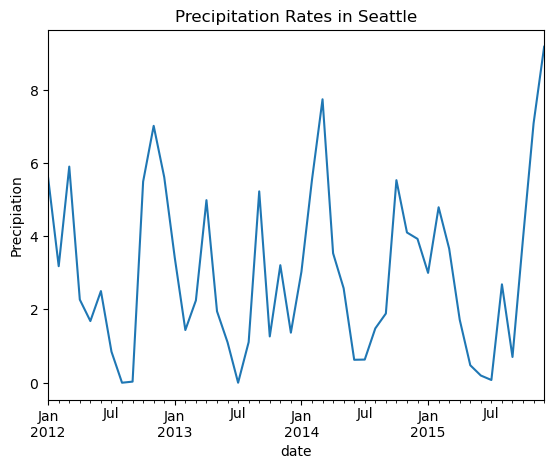

In [31]:
seattle.precipitation.resample('M').mean().plot()
plt.title('Precipitation Rates in Seattle')
plt.ylabel('Precipiation')
plt.show()

<b>3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

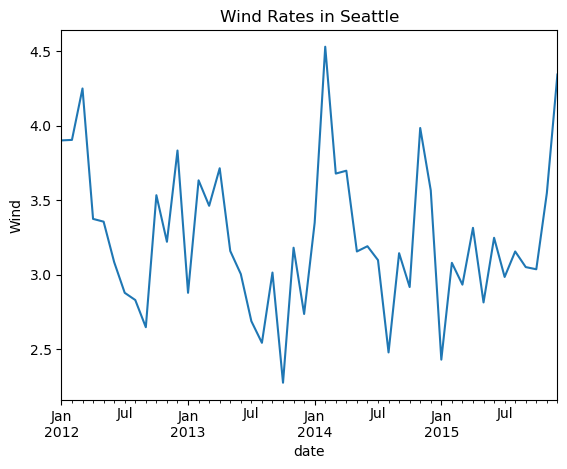

In [32]:
seattle.wind.resample('M').mean().plot()
plt.title('Wind Rates in Seattle')
plt.ylabel('Wind')
plt.show()

<b>4. Which year-month combination is the windiest?</b>
- <b>Answer</b>: December 2012 (2012-12-17) with 9.50

In [33]:
seattle.wind.sort_values(ascending=False).head(1)

date
2012-12-17    9.5
Name: wind, dtype: float64

<b>5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)</b>
- <b>Answer</b>: 2014 (2014-12-31) with 211 days of sun

In [34]:
#take a look at weather types
seattle.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [35]:
#see the counts for each type
seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [36]:
#create a column for days that are sunny
seattle['sunny_day'] = seattle.weather == 'sun'

In [37]:
#take a look at the new column
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False


In [38]:
#resample by year to answer question
seattle.sunny_day.resample('Y').sum().sort_values(ascending=False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: sunny_day, dtype: int64

In [39]:
#can also look at average
seattle.sunny_day.resample('Y').mean().sort_values(ascending=False)

date
2014-12-31    0.578082
2013-12-31    0.561644
2015-12-31    0.493151
2012-12-31    0.322404
Name: sunny_day, dtype: float64

<b>6. In which month does it rain the most?</b>

<div class="alert alert-block alert-info">
<b>Note:</b> 
<br>
This question could be interpreted in many different ways:
<br>

- Which month has the most days of rainfall (combined) between 2012 and 2015?
    - <b>Answer</b>: February (2) with 40 total days of rain.
- Which month has the most precipitation (combined) between 2012 and 2015?
    - <b>Answer</b>: November (11) with 642.50cm of total precipation.
- Which month has the highest average rainfall? 
    - <b>Answer</b>: November (11) with an average of 5.35cm of precipation.
</div>

In [40]:
#create a column for days that are sunny
seattle['rainy_day'] = seattle.weather == 'rain'

In [41]:
#take a look at the new column
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True


In [42]:
#create column to identify month!
seattle['month'] = seattle.index.month_name()

In [43]:
#take a look at the new column
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day,month
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False,January
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True,January
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True,January
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True,January
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True,January


In [44]:
#resample by month to answer question
#this only gives me monthly totals individuals
seattle.rainy_day.resample('M').sum().sort_values(ascending=False)

date
2012-11-30    25
2012-12-31    23
2013-02-28    23
2012-03-31    19
2012-04-30    19
2012-06-30    19
2013-03-31    18
2012-01-31    18
2012-10-31    17
2012-02-29    17
2013-01-31    16
2012-05-31    16
2012-07-31    12
2012-09-30     4
2012-08-31     2
2015-08-31     2
2013-10-31     1
2014-08-31     1
2014-07-31     1
2015-01-31     1
2015-04-30     1
2014-10-31     1
2013-08-31     1
2013-07-31     1
2015-10-31     1
2015-07-31     0
2015-06-30     0
2015-05-31     0
2015-03-31     0
2015-02-28     0
2014-11-30     0
2015-11-30     0
2014-12-31     0
2015-09-30     0
2014-01-31     0
2014-09-30     0
2014-06-30     0
2014-05-31     0
2014-04-30     0
2014-03-31     0
2014-02-28     0
2013-12-31     0
2013-11-30     0
2013-09-30     0
2013-06-30     0
2013-05-31     0
2013-04-30     0
2015-12-31     0
Name: rainy_day, dtype: int64

In [45]:
seattle.month.value_counts()

January      124
March        124
May          124
July         124
August       124
October      124
December     124
April        120
June         120
September    120
November     120
February     113
Name: month, dtype: int64

In [46]:
#by month... descending precipiation amounts
seattle.groupby('month').precipitation.sum().sort_values(ascending=False)

#November had 642.5 days of rain between 2012 and 2015

month
November     642.5
December     622.7
March        606.2
October      503.4
January      466.0
February     422.0
April        375.4
September    235.5
May          207.5
August       163.7
June         132.9
July          48.2
Name: precipitation, dtype: float64

In [47]:
#if we are asking... which month has the most days with rain
#answer is February
seattle.groupby('month').rainy_day.sum().sort_values(ascending=False)

month
February     40
March        37
January      35
November     25
December     23
April        20
October      20
June         19
May          16
July         14
August        6
September     4
Name: rainy_day, dtype: int64

In [48]:
seattle.groupby('month').precipitation.mean().sort_values(ascending=False)

month
November     5.354167
December     5.021774
March        4.888710
October      4.059677
January      3.758065
February     3.734513
April        3.128333
September    1.962500
May          1.673387
August       1.320161
June         1.107500
July         0.388710
Name: precipitation, dtype: float64

<b>7. Which month has the most number of days with a non-zero amount of precipitation?</b>
- <b>Answer</b>: if using 'rain' from weather- February has the most rain
- <b>Answer</b>: if using 'precipiation' column > 0, December has most rain

In [49]:
seattle.groupby('month').rainy_day.mean().sort_values(ascending=False)

month
February     0.353982
March        0.298387
January      0.282258
November     0.208333
December     0.185484
April        0.166667
October      0.161290
June         0.158333
May          0.129032
July         0.112903
August       0.048387
September    0.033333
Name: rainy_day, dtype: float64

In [50]:
## Can also use precipitation
seattle['precip_amnt'] = seattle.precipitation > 0

In [51]:
#look at column
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day,month,precip_amnt
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False,January,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True,January,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True,January,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True,January,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True,January,True


In [52]:
seattle.groupby('month').precip_amnt.mean().sort_values(ascending=False)

month
December     0.653226
February     0.646018
November     0.591667
March        0.588710
January      0.532258
October      0.491935
April        0.491667
June         0.308333
September    0.291667
May          0.274194
August       0.177419
July         0.088710
Name: precip_amnt, dtype: float64

<hr style="border:2px solid gray">

### Part III: ```flights_20k```

Use the ```flights_20k``` dataset for the following exercises:

1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

In [53]:
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [54]:
#check dtypes
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [55]:
#check the index- should be date
type(flights.index)

pandas.core.indexes.range.RangeIndex

In [56]:
#must complete step 2&3 (set date as index and sort)
flights = flights.set_index('date').sort_index()

In [57]:
#confirm the change
type(flights.index)

pandas.core.indexes.datetimes.DatetimeIndex

<b>1. Convert any negative delays to 0.</b>

In [58]:
#Correct all negative delays to 0 using np.where
flights['delay'] = np.where(flights['delay'] < 0, 0, flights['delay'])

#make sure it worked
flights.sample(5)

,delay,distance,origin,destination
date,,,,
2001-02-06 17:45:00,0,787,MCO,BWI
2001-01-04 09:25:00,0,288,ALB,BWI
2001-02-23 20:25:00,57,180,OAK,RNO
2001-03-17 08:05:00,8,314,BWI,CLE
2001-03-06 12:55:00,0,1069,SAT,LAS


<b>2. Which hour of the day has the highest average delay?</b>
- <b>Answer</b>: 3am (03) with 302.6 average minutes of delay

In [59]:
#Create an hour column
flights['hour'] = flights.index.strftime('%H')
flights.sample(3)

,delay,distance,origin,destination,hour
date,,,,,
2001-03-02 14:00:00,0,192,HOU,SAT,14
2001-03-11 19:01:00,29,239,DAL,HOU,19
2001-02-01 10:05:00,0,217,IAH,DAL,10


In [60]:
#Group by hour to find the hour with the greatest average delay
flights.groupby('hour').delay.mean().sort_values(ascending=False).head(1)

hour
03    302.5
Name: delay, dtype: float64

In [61]:
#Use idxmax to return the hour
flights.groupby('hour').delay.mean().idxmax()

'03'

<b>3. Does the day of the week make a difference in the delay amount?</b>
- <b>Answer</b>: Yes. The weekday does matter
    - Friday has the longest delay. Monday has the shortest delay.
    - BUT Wednesday has the most delays and Saturday has the least delays

In [62]:
flights.resample('D').delay.mean()

date
2001-01-01     8.747126
2001-01-02    21.808411
2001-01-03    17.150000
2001-01-04     7.176724
2001-01-05     9.294118
                ...    
2001-03-27     4.669683
2001-03-28     3.551282
2001-03-29    13.545455
2001-03-30     8.893162
2001-03-31     7.000000
Freq: D, Name: delay, Length: 90, dtype: float64

In [63]:
flights['day'] = flights.index.day_name()

In [64]:
flights.sample(5)

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-03-09 08:20:00,0,407,LAS,OAK,08,Friday
2001-02-19 09:10:00,0,628,SAN,ABQ,09,Monday
2001-03-21 20:25:00,0,842,TPA,BWI,20,Wednesday
2001-01-04 11:50:00,20,370,LAX,PHX,11,Thursday
2001-02-16 10:30:00,0,1444,MDW,PHX,10,Friday


In [65]:
weekday_delay = flights.groupby('day').delay.mean().sort_values(ascending=False)
weekday_delay

day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

In [66]:
#see what days have what number of delays
flights.day.value_counts()

Wednesday    3079
Friday       3028
Thursday     3011
Monday       2980
Tuesday      2945
Sunday       2614
Saturday     2343
Name: day, dtype: int64

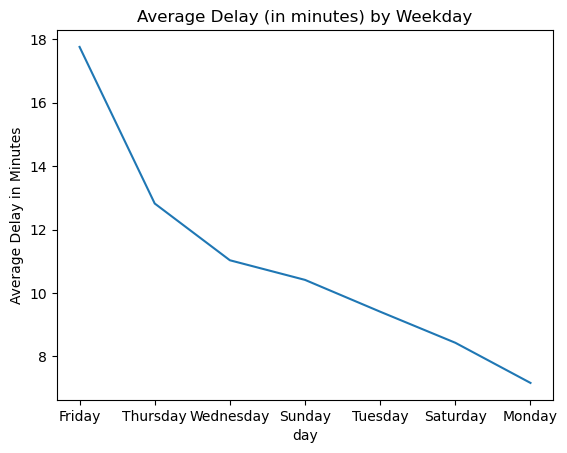

In [67]:
#plot the average delay time by day
weekday_delay.plot()
plt.title('Average Delay (in minutes) by Weekday')
plt.ylabel('Average Delay in Minutes')
plt.show()

<b>4. Does the month make a difference in the delay amount?</b>

In [68]:
#create a column for month
flights['month'] = flights.index.month_name()

In [69]:
#make sure column was created
flights.sample(5)

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-03-02 21:00:00,38,373,SMF,LAX,21,Friday,March
2001-01-19 14:35:00,0,682,BHM,BWI,14,Friday,January
2001-03-07 19:45:00,0,351,STL,TUL,19,Wednesday,March
2001-03-27 18:05:00,0,236,LAX,LAS,18,Tuesday,March
2001-01-21 17:50:00,0,389,ONT,SMF,17,Sunday,January


In [70]:
#see average minutes of delay by month
monthly_delay = flights.groupby('month').delay.mean()
monthly_delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

In [71]:
#see how many delays are in each month
flights.month.value_counts()

March       6960
January     6784
February    6256
Name: month, dtype: int64

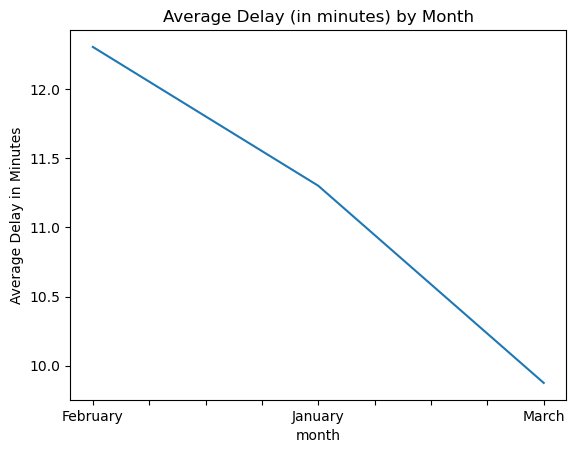

In [72]:
monthly_delay.plot()
plt.title('Average Delay (in minutes) by Month')
plt.ylabel('Average Delay in Minutes')
plt.show()

<hr style="border:2px solid gray">
<hr style="border:2px solid gray">

### Bonus I : ```iowa_electricity```

Use the ```iowa_electricity``` dataset for the following exercises:

1. For each row, calculate the percentage of the year's total that energy source provided.
2. Lineplot of generation over time, color by source
3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
5. Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- Express each number as a % of the year's total

In [73]:
#acquire data and assign to variable
iowa = data.iowa_electricity()

#take a look
iowa.sample(5)

,year,source,net_generation
47,2014-01-01,Renewables,17452
38,2005-01-01,Renewables,2724
11,2012-01-01,Fossil Fuels,37379
7,2008-01-01,Fossil Fuels,42734
40,2007-01-01,Renewables,3870


In [74]:
#check dtypes
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


<div class="alert alert-block alert-success">
<b>Takeaways:</b>
<br>

- The dataframe only has three columns (year, source and net)
<br>

- We want to set the year to our index
<br>

- If year was not already a datetime64[ns], we would need to convert it to one 

</div>

In [75]:
#check index, make sure it's set to year
type(iowa.index)

pandas.core.indexes.range.RangeIndex

In [76]:
#set date as index and sort
iowa = iowa.set_index('year').sort_index()

In [77]:
#confirm index is changed
type(iowa.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [78]:
#we can see that year is now our index
iowa.sample(3)

,source,net_generation
year,,
2002-01-01,Nuclear Energy,4574
2009-01-01,Fossil Fuels,38620
2002-01-01,Fossil Fuels,35991


<b> #1. For each row, calculate the percentage of the year's total that energy source provided</b>

In [79]:
#create column for year only
iowa['number_year'] = iowa.index.year

In [80]:
iowa.sample(3)

,source,net_generation,number_year
year,,,
2013-01-01,Renewables,16476,2013
2008-01-01,Nuclear Energy,5282,2008
2001-01-01,Fossil Fuels,35361,2001


In [81]:
#this gives average by year for all source types
iowa.groupby('number_year').net_generation.mean()

number_year
2001    13550.333333
2002    14176.000000
2003    14035.666667
2004    14412.000000
2005    14715.000000
2006    15157.666667
2007    16592.666667
2008    17695.333333
2009    17286.333333
2010    19169.666667
2011    18790.333333
2012    18891.666667
2013    18890.000000
2014    18951.333333
2015    18884.333333
2016    18127.000000
2017    18825.333333
Name: net_generation, dtype: float64

In [82]:
#this gives average generation by source type
iowa.groupby('source').net_generation.mean()

source
Fossil Fuels      36478.176471
Nuclear Energy     4711.941176
Renewables         9660.000000
Name: net_generation, dtype: float64

<b> #2. Lineplot of generation over time, color by source</b>

<b> #3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)</b>

In [83]:
table = pd.pivot_table(iowa, values='source',
                    columns=['year'], aggfunc=np.sum, fill_value=0)

In [85]:
table

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
source,Fossil FuelsNuclear EnergyRenewables,Fossil FuelsNuclear EnergyRenewables,Fossil FuelsNuclear EnergyRenewables,Fossil FuelsNuclear EnergyRenewables,Nuclear EnergyRenewablesFossil Fuels,RenewablesFossil FuelsNuclear Energy,RenewablesFossil FuelsNuclear Energy,RenewablesFossil FuelsNuclear Energy,RenewablesNuclear EnergyFossil Fuels,Nuclear EnergyRenewablesFossil Fuels,Nuclear EnergyRenewablesFossil Fuels,Nuclear EnergyRenewablesFossil Fuels,RenewablesFossil FuelsNuclear Energy,Nuclear EnergyRenewablesFossil Fuels,Fossil FuelsNuclear EnergyRenewables,RenewablesFossil FuelsNuclear Energy,Fossil FuelsNuclear EnergyRenewables


In [87]:
iowa.head()

,source,net_generation,number_year
year,,,
2001-01-01,Fossil Fuels,35361,2001
2001-01-01,Nuclear Energy,3853,2001
2001-01-01,Renewables,1437,2001
2002-01-01,Fossil Fuels,35991,2002
2002-01-01,Nuclear Energy,4574,2002


<b> #4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?</b>

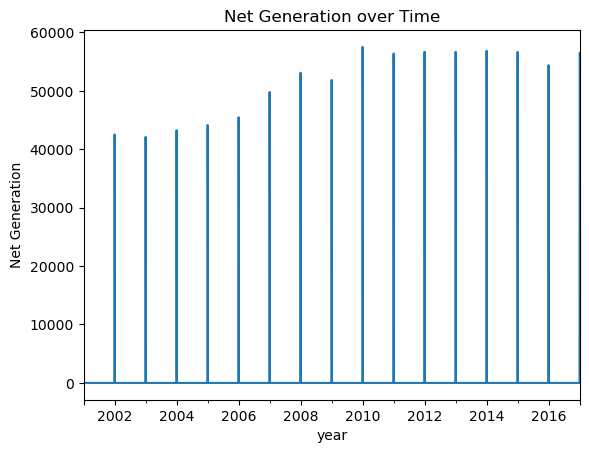

In [90]:
#resample temperatures by day- get min max and average
iowa.net_generation.resample('D').sum().plot()
plt.title('Net Generation over Time')
plt.ylabel('Net Generation')
plt.show()

<b> 5. Is the total generation increasing over time?</b>

<b> - How would you control for increasing consumption over time when considering how much energy is coming from each source?</b>

<b> - Express each number as a % of the year's total</b>

<hr style="border:2px solid gray">

### Bonus II: ```sf_temps```

Use the ```sf_temps``` dataset
1. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
2. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
3. Create pretty labels for time plots
4. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [91]:
sf = sf_temps

<b> #1. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)</b>

In [92]:
sf = sf.resample('D').mean()
# create a categorical feature
sf['temp_bin'] = pd.qcut(sf.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
sf.groupby('temp_bin').mean()

,temp
temp_bin,
cold,50.893705
cool,54.996323
warm,59.632280
hot,62.239194


<b> #2. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.</b>

<AxesSubplot:xlabel='date'>

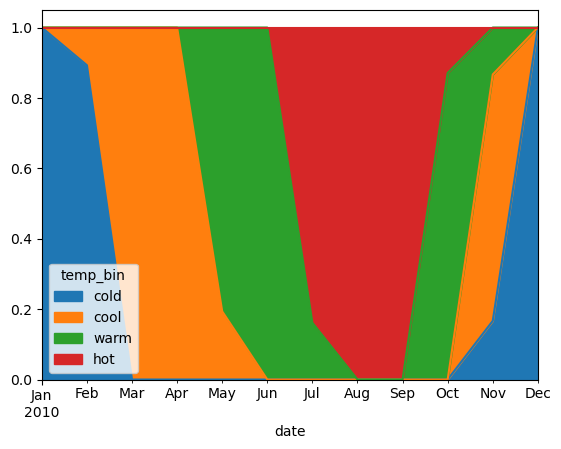

In [96]:
(sf.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)

<b> #3. Create pretty labels for time plots</b>

Text(0, 0.5, '% of days in the month')

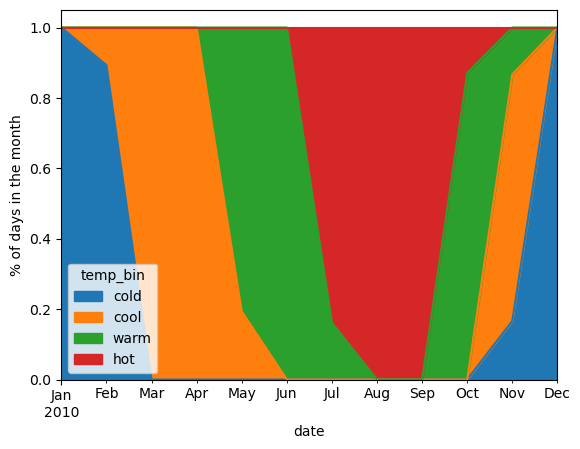

In [97]:
(sf.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)

plt.ylabel('% of days in the month')

<b> #4. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar</b>

<hr style="border:2px solid gray">

### Bonus III: ```birdstrikes```

1. Explore the ```birdstrikes``` dataset

In [98]:
birds_df = data.birdstrikes()

In [99]:
birds_df.sample(3)

,Airport__Name,Aircraft__Make_Model,Effect__Amount_of_damage,Flight_Date,Aircraft__Airline_Operator,Origin_State,When__Phase_of_flight,Wildlife__Size,Wildlife__Species,When__Time_of_day,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
9151,JOHN F KENNEDY INTL,B-767-200,None,10/3/01 0:00,AMERICAN AIRLINES,New York,Take-off run,Medium,Herring gull,Day,0,0,0,NaN
190,SALT LAKE CITY INTL,MD-87,None,8/13/90 0:00,AMERICAN AIRLINES,Utah,Climb,Small,Unknown bird - small,Day,0,0,0,150.0
5605,PHOENIX SKY HARBOR,B-737-300,None,5/26/98 0:00,AMERICA WEST AIRLINES,Arizona,Approach,Small,Unknown bird - small,Day,0,0,0,NaN


In [100]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Airport__Name               10000 non-null  object 
 1   Aircraft__Make_Model        10000 non-null  object 
 2   Effect__Amount_of_damage    10000 non-null  object 
 3   Flight_Date                 10000 non-null  object 
 4   Aircraft__Airline_Operator  10000 non-null  object 
 5   Origin_State                10000 non-null  object 
 6   When__Phase_of_flight       10000 non-null  object 
 7   Wildlife__Size              10000 non-null  object 
 8   Wildlife__Species           10000 non-null  object 
 9   When__Time_of_day           10000 non-null  object 
 10  Cost__Other                 10000 non-null  int64  
 11  Cost__Repair                10000 non-null  int64  
 12  Cost__Total_$               10000 non-null  int64  
 13  Speed_IAS_in_knots          7164

<b>Ask questions of the data</b>
- Should we convert Flight_Date to datetime and set to index?
- How many different airports are represented?
- What is the average size of the birdstrike?

In [101]:
#convert Flight_Date to datetime
birds_df.Flight_Date = pd.to_datetime(birds_df.Flight_Date)

In [102]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Airport__Name               10000 non-null  object        
 1   Aircraft__Make_Model        10000 non-null  object        
 2   Effect__Amount_of_damage    10000 non-null  object        
 3   Flight_Date                 10000 non-null  datetime64[ns]
 4   Aircraft__Airline_Operator  10000 non-null  object        
 5   Origin_State                10000 non-null  object        
 6   When__Phase_of_flight       10000 non-null  object        
 7   Wildlife__Size              10000 non-null  object        
 8   Wildlife__Species           10000 non-null  object        
 9   When__Time_of_day           10000 non-null  object        
 10  Cost__Other                 10000 non-null  int64         
 11  Cost__Repair                10000 non-null  int64      

In [103]:
#set to index?
birds_df = birds_df.set_index('Flight_Date').sort_index()

In [104]:
#make sure index was reset
type(birds_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [105]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 1990-01-08 to 2002-07-25
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Airport__Name               10000 non-null  object 
 1   Aircraft__Make_Model        10000 non-null  object 
 2   Effect__Amount_of_damage    10000 non-null  object 
 3   Aircraft__Airline_Operator  10000 non-null  object 
 4   Origin_State                10000 non-null  object 
 5   When__Phase_of_flight       10000 non-null  object 
 6   Wildlife__Size              10000 non-null  object 
 7   Wildlife__Species           10000 non-null  object 
 8   When__Time_of_day           10000 non-null  object 
 9   Cost__Other                 10000 non-null  int64  
 10  Cost__Repair                10000 non-null  int64  
 11  Cost__Total_$               10000 non-null  int64  
 12  Speed_IAS_in_knots          7164 non-null   float64
dtypes: float64(1),

In [106]:
# What is the average size of the birdstrike?
birds_df.Wildlife__Size .value_counts()

Small     4910
Medium    4346
Large      744
Name: Wildlife__Size, dtype: int64

<AxesSubplot:xlabel='Wildlife__Size', ylabel='count'>

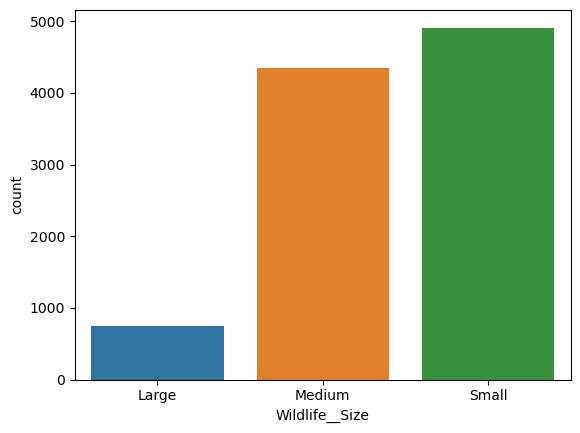

In [107]:
import seaborn as sns
sns.countplot(x=birds_df["Wildlife__Size"])

In [108]:
#How many different states are represented?
birds_df.Origin_State.value_counts()

Texas             1495
California         890
Louisiana          618
Tennessee          569
Kentucky           535
Pennsylvania       514
Illinois           505
DC                 475
New York           391
Missouri           376
Hawaii             352
New Jersey         351
North Carolina     269
Florida            246
Oregon             245
South Carolina     242
Utah               236
Georgia            211
Ohio               210
Maryland           201
Colorado           187
Massachusetts      146
Indiana            144
Nebraska           118
Arizona            111
Minnesota          103
Washington         103
Oklahoma            83
Michigan            74
Name: Origin_State, dtype: int64

In [109]:
birds_df.Aircraft__Airline_Operator.value_counts()

AMERICAN AIRLINES                 2171
US AIRWAYS*                       1084
DELTA AIR LINES                    865
SOUTHWEST AIRLINES                 844
MILITARY                           829
UNITED AIRLINES                    534
BUSINESS                           371
FEDEX EXPRESS                      365
AMERICA WEST AIRLINES              275
NORTHWEST AIRLINES                 256
AMERICAN EAGLE AIRLINES            223
UPS AIRLINES                       223
CONTINENTAL AIRLINES               187
ALOHA AIRLINES                     184
TRANS WORLD AIRLINES               163
ATLANTIC COAST AIRLINES            138
COMAIR AIRLINES                    113
EXPRESSJET (CONTINENTAL EXPRS)     106
ALASKA AIRLINES                    102
HORIZON AIR                        102
HAWAIIAN AIR                        97
ABX AIR                             76
UNKNOWN                             72
AIR CANADA                          69
SKYWEST AIRLINES                    68
MESABA AIRLINES          